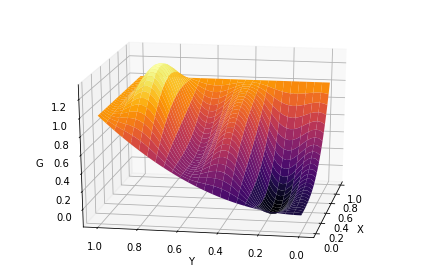

In [144]:
from scipy import sparse
from scipy.sparse.linalg import spsolve
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm



def example(x, y):#задает функцию f
    return 2 *np.pi**2 * np.multiply(np.sin(np.pi*x), 4*np.cos(np.pi*5*y))


def boundary(x, y, M): #задает граничные условия

    array = np.zeros((M+1, M+1))
    array[:, 0] = y[:, 0]**2
    array[:, M] = np.ones((M+1, 1)).ravel()
    array[0, :] = x[0, :]**3
    array[M, :] = np.ones((1, M+1)).ravel()
    return array


def generate_sparse_matrix(M):

    main_diag = 2 * np.ones((M - 1, 1)).ravel()
    off_diag = -1 * np.ones((M - 2, 1)).ravel()

    diagonals = [main_diag, off_diag, off_diag]

    b1 = sparse.diags(diagonals, [0, -1, 1], shape=(M - 1, M - 1)).toarray()
    sB = sparse.csc_matrix(b1)

    I = sparse.eye(M - 1, format="csr").toarray()
    sI = sparse.csc_matrix(I)

    a1 = sparse.kron(sI, sB).toarray()
    a2 = sparse.kron(sB, sI).toarray()
    matrix = sparse.csc_matrix(a1 + a2)

    return matrix


M = 50
a = 0.0
b = 1.0

h = (b - a)/M
x1 = np.linspace(a, b, M+1) #M+1 чисел от a до b включительно

xx, yy = np.meshgrid(x1, x1) #создаем сетку, где по х и по у значения х1

f = example(xx, yy)
f = np.array(f.T)[1:M, 1:M].reshape(((M-1)*(M-1), 1))#Переформируем массив, (M-1)*(M-1)строк по 1 элементу в каждой

#учитываем граничные условия
G = boundary(xx, yy, M)

#Переорганизуем матрицу G в массив
g = np.zeros(((M-1)**2, 1))
g[0:M-1, 0] = G[1:M, 0]
g[(M-1)**2-M+1:M**2, 0] = G[1:M, M]
g[0:M**2:M-1, 0] = g[0:M**2:M-1, 0] + G[0, 1:M]
g[M-2:M**2:M-1, 0] = g[M-2:M**2:M-1, 0] + G[M, 1:M]

A = generate_sparse_matrix(M)

#A*U=F --> U=A\F
U = spsolve(A, f*(h**2)+g)
U = U.reshape((M-1, M-1)).T

G[1:M, 1:M] = U

#строим график
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, G, cmap=cm.inferno, linewidth=0, antialiased=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('G')
plt.tight_layout()
ax.view_init(20, 190)
plt.show()

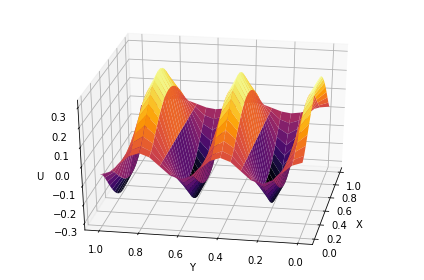

In [148]:
from scipy import sparse
from scipy.sparse.linalg import spsolve
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

M = 20
x0 = 0.0
xf = 1.0
y0 = 0.0
yf = 1.0

hx = (xf - x0)/M
hy = (yf - y0)/M

yy, xx = np.meshgrid(np.linspace(x0, xf, M+1), np.linspace(y0, yf, M+1))

alpha = hx**2/hy**2
main_diag = 2*(1+alpha)*np.ones((M+1, 1)).ravel()
off_diag = -1*np.ones((M, 1)).ravel()

a = main_diag.shape[0]

diagonals = [main_diag, off_diag, off_diag]

B = sparse.diags(diagonals, [0,-1,1], shape=(a,a)).toarray()
B[0,1] = -2
D = sparse.diags([-1*np.ones((M+1, 1)).ravel()], [0], shape=(a,a)).toarray()
C = sparse.diags([-2*np.ones((M+1, 1)).ravel()], [0], shape=(a,a)).toarray()


E1 = sparse.eye(M+1).toarray()
E2 = sparse.diags([1*np.ones((M, 1)).ravel(),1*np.ones((M, 1)).ravel()], [-1,1], shape=(M+1,M+1)).toarray()
E2[0,:] = 0
E2[M,:] = 0
E3 = sparse.diags([1*np.ones((M, 1)).ravel(),1*np.ones((M, 1)).ravel()], [-1,1], shape=(M+1,M+1)).toarray()
E3[1:M,0:M+1] = 0

A1 = sparse.kron(E1,B).toarray()
A2 = sparse.kron(E2,D).toarray()
A3 = sparse.kron(E3,C).toarray()
A = A1 + A2 + A3


f = 2 *np.pi**2 * np.multiply(np.sin(np.pi*xx), 4*np.cos(np.pi*5*yy)) #example f
f = np.array(f.T)[0:M+1,0:M+1].reshape(((M+1)*(M+1),1))

# Нулевые граничные условия содержатся в матрице A.

U = np.linalg.solve(A,f*(hx**2))  # Решаем x=A\b
U = U.reshape((M+1,M+1)).T


#строим график с начальными нулевыми условиями
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, U, cmap=cm.inferno, linewidth=0, antialiased=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U')
plt.tight_layout()
ax.view_init(30, 190)
plt.show()